# Cross checking runs with r_es = 0.0002 and r_es=0.0001

Rerunning X8 simulations showed, that the dynamics fundamentally changed for the same parameter settings, that I ran about a year ago.
I suspect that this happened due to updates of python packages that lead to changes in some calculations in the model that I didn't notice due to the fact, that I have not implemented proper testing so far.

Therefore, I ran the model with changed parameters to see, if I can reproduce the origninal oscillating behavior.

To get results quicker, I only do 2 model runs which gives less statistics but should still be enough to see the qualitiative behavior of the model

In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 6)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

d_start = 150
d_length = 20

testing = False

location = '/home/jakob/Project_MayaSim/output_data/X8_longterm_dynamics/results/aggregated_trajectory'
if testing:
    location = '/home/jakob/Project_MayaSim/Python/output_data/test_output/X8_longterm_dynamics/results/trajectory'
    
data = pd.read_pickle(location)

def plot(obs, data):
    r_trades = data.index.levels[0].values
    fig = plt.figure()
    k = 0
    plots = []
    for j, r in enumerate(r_trades):
        k += 1
        ax = fig.add_subplot(1, len(r_trades), j + 1)
        ax.set_title('{}) r_trade = {}'.format(k, r))
        dt = data['<mean_trajectories>'].xs(level=('r_trade', 'observables'), key=(r, obs))
        de = data['<sigma_trajectories>'].xs(level=('r_trade', 'observables'), key=(r, obs))
        dt.plot(ax=ax)
        dtt = de.index.values
        ddt = dt.values
        dde = de.values
        plt.fill_between(dtt, ddt - dde, ddt + dde, alpha=0.2)

        ax.set_ylabel(obs)
        #ax.axvspan(d_start, d_start + d - 1, alpha=0.5, color='grey')
        plots.append((r, k, obs))
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        fig.tight_layout()
    return (fig, plots)
print(data.index.levels)
data.head()

Populating the interactive namespace from numpy and matplotlib
[[6000, 7000, 8000, 10000], [0.0001, 0.00012, 0.00013, 0.00014, 0.00015, 0.00016, 0.00018, 0.0002], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...], ['MAP', 'built trade links', 'es_income_agricultural_productivity', 'es_income_forest', 'es_income_pop_density', 'es_income_precipitation', 'es_income_waterflow', 'forest_state_1_cells', 'forest_state_2_cells', 'forest_state_3_cells', 'killed settlements', 'lost trade links', 'max settlement population', 'max_AG', 'max_ES', 'max_bca', 'max_cluster_size', 'max_npp', 'max_pop_grad', 'max_soil_deg', 'mean_cluster_size', 'mean_soil_degradat

key                                                           <mean_trajectories>  \
r_trade r_es   timesteps observables                                                
6000    0.0001 0         MAP                                          1630.514364   
                         built trade links                               0.000000   
                         es_income_agricultural_productivity             0.000000   
                         es_income_forest                             3140.893699   
                         es_income_pop_density                           0.000000   

key                                                           <sigma_trajectories>  
r_trade r_es   timesteps observables                                                
6000    0.0001 0         MAP                                              0.000000  
                         built trade links                                0.000000  
                         es_income_agricultural_productivity              0.000000  
                         es_income_forest                               540.498071  
                         es_income_pop_density                            0.000000

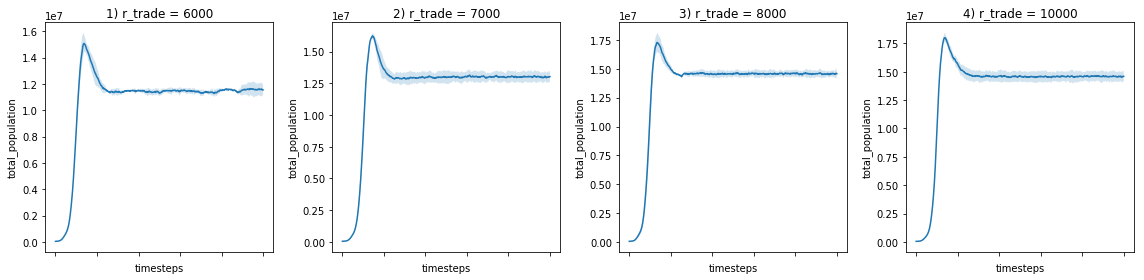

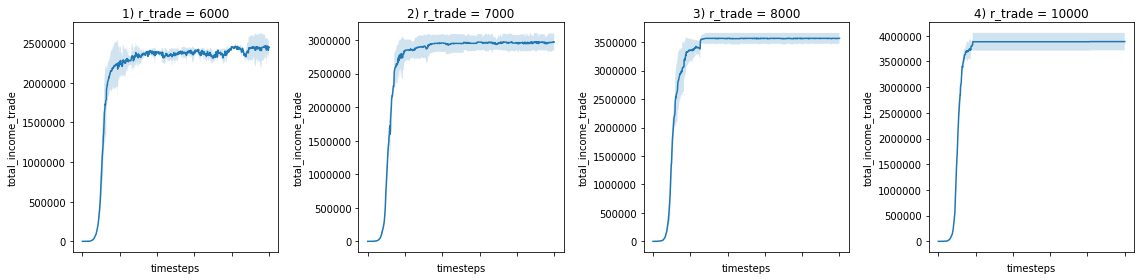

In [2]:
pylab.rcParams['figure.figsize'] = (16, 4)

r_trades = data.index.levels[0].values
df = data.xs(key=(0.0002),level=('r_es'))

fig, plots = plot('total_population', df)
fig, plots = plot('total_income_trade', df)

**The plots above show the long run data (aggregated from 50 runs) for total population and total income from trade with r_es = 0.0002 like in the old days**

We see:

* unlike before, when these parameter settings lead to oscillating behavior of the model,
* now we have a stable complex society state, that draws its income primarily from trade and ecosystem income.

Therefore, I suspect, that somehow, income from ecosystem services are substantially higher now with the same parameters.

I also suspect, that if I lower the income from ecosystem services, I will find the oscillating regime again.

**See below, the same plots for r_es=0.0001:**

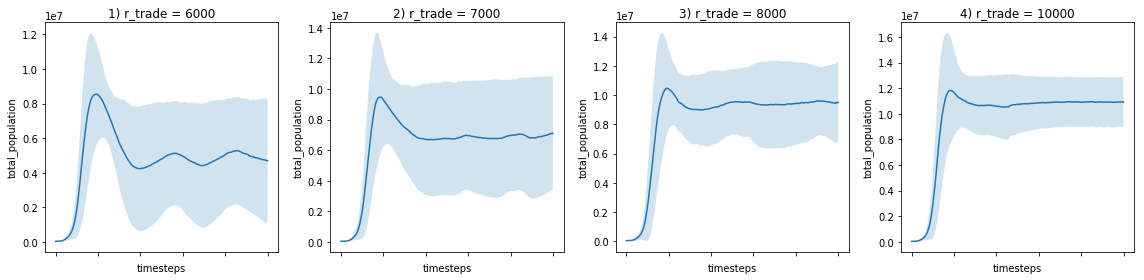

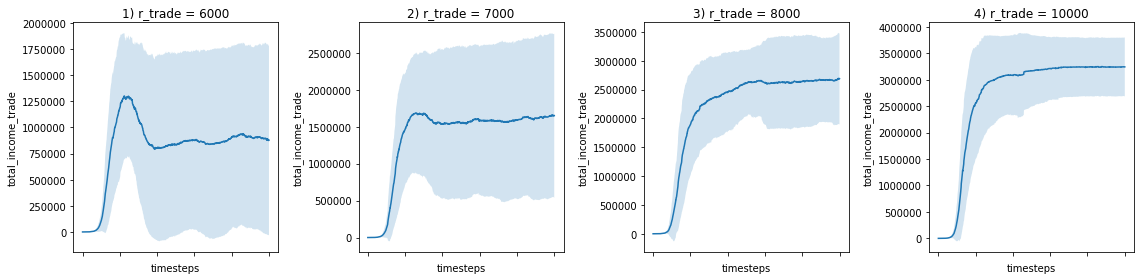

In [3]:
pylab.rcParams['figure.figsize'] = (16, 4)

r_trades = data.index.levels[0].values
df = data.xs(key=(0.0001),level=('r_es'))

fig, plots = plot('total_population', df)
fig, plots = plot('total_income_trade', df)

**et viola, there it is again**

So, my suspicion was right. Actually, I don't really care what changed. I will just freeze the setup of the python environment that produced these results and not change it again. I will also version it in the code repository to make these results reproducable and to prevent such problems in the future.

In [5]:
location = '/home/jakob/Project_MayaSim/output_data/X8_longterm_dynamics/results/all_trajectories'
all_data = pd.read_pickle(location).xs(key=(0.0001),level=('r_es'))

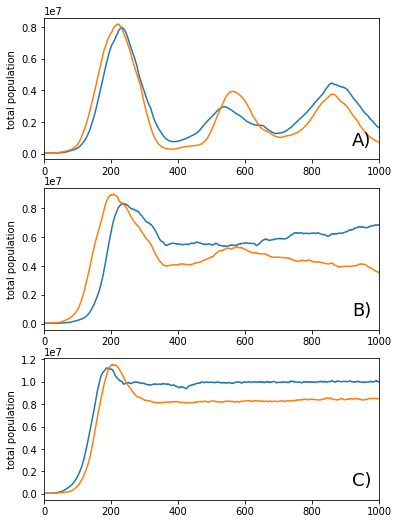

In [7]:
pylab.rcParams['figure.figsize'] = (6, 12)
all_data.columns = range(0,14)
all_data.loc[6000, 1]

runs  = range(0, 2)
r_trades = all_data.index.values
fig = plt.figure()

annotations=['A)', 'B)', 'C)', 'D)']
for i, r_trade in enumerate(r_trades[[0, 1, 3]]):
    
    ax = fig.add_subplot(4, 1, i + 1)
    observable = 'total_population'

    for run in [0,1]:
        all_data.loc[r_trade, run][observable].plot(legend=(True if i == len(r_trades) - 1 else False))
    ax.set_xlim([0,1000])
    ax.annotate(annotations[i], xy=(0,0), xycoords='data', xytext=(0.92, 0.1), textcoords='axes fraction', fontsize=18)
    ax.set_ylabel('total population')
    if i == len(r_trades)-1:
        ax.set_xlabel('time in years')
        leg = ax.get_legend()
        for j, text in enumerate(leg.get_texts()):
            text.set_text('run {}'.format(j+1))

plt.savefig('longterm_population_development.pdf')

**The plots above show the total population of single two single runs for different possible trade income. but with r_es=0.0001**

We still see:

* cyclical rise and fall for low possible income from trade,
* stable society with high trade income with higher possible income from trade
* we also see, that the oscillations happen with roughly the same frequency, but also somewhat chaotically, so they will vanish if I average over many runs.

/home/jakob/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


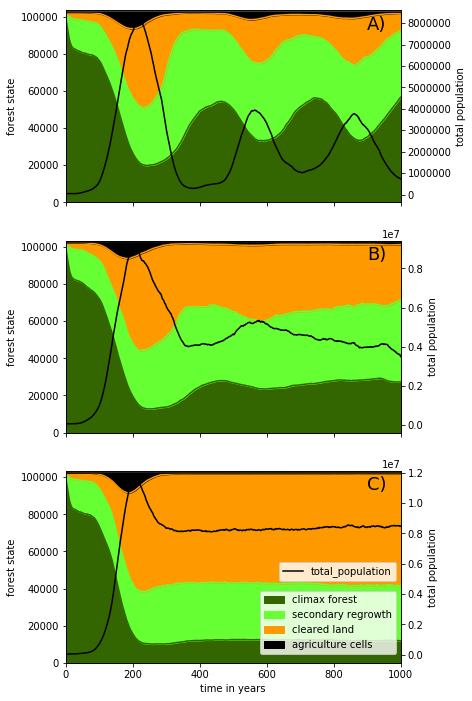

In [9]:
pylab.rcParams['figure.figsize'] = (6, 12)
all_data.columns = range(0,14)
all_data.loc[6000, 1]

runs  = range(0, 2)
r_trades = all_data.index.values
fig = plt.figure()

annotations=['A)', 'B)', 'C)']
colors = ['#336600', '#66FF33', '#FF9900', 'black']
for i, r_trade in enumerate(r_trades[[0,1,3]]):
    
    ax = fig.add_subplot(3, 1, i + 1)
    observables = ['forest_state_3_cells', 'forest_state_2_cells', 'forest_state_1_cells', 'total_agriculture_cells']
    forest_data = all_data.loc[r_trade, run][observables]
    forest_data['forest_state_1_cells'] = forest_data['forest_state_1_cells'].sub(forest_data['total_agriculture_cells'])
    forest_data.columns = ['climax forest', 'secondary regrowth', 'cleared land', 'agriculture cells']
    run = 1
    ln1 = forest_data.plot.area(stacked=True, 
                                legend=(True if i == len(r_trades) - 2 else False), 
                                ax=ax,
                                color=colors)
    ax2 = ax.twinx()
    ln2 = all_data.loc[r_trade, run]['total_population'].plot(legend=(True if i == len(r_trades) - 2 else False), 
                                                              ax=ax2, 
                                                              color='k')
    #print(all_data.loc[r_trade, run][observables])
    ax.set_xlim([0,1000])
    ax.annotate(annotations[i], xy=(0,0), xycoords='data', xytext=(0.9, 0.9), textcoords='axes fraction', fontsize=18)
    ax2.set_ylabel('total population')
    ax.set_ylabel('forest state')
    ax.set_ylim([0, 103400])
    if i == len(r_trades)-2:
        ax.set_xlabel('time in years')
        lgd2 = ax.legend(loc=1, bbox_to_anchor=[1, .4])
        lgd1 = ax2.legend(loc=1, bbox_to_anchor=[1., .55])
#fig.tight_layout()
fig.savefig('longterm_population_development.pdf', transparent=True, dpi=200)

The results above show, that for these parameter settings, population is somewhat lower than in the old runs and the forest ecosystem is in a somewhat better shape.
This suggests, that a value of r_es that is a bit above r_es=0.0001 will lead to results, that are more similar to the old ones.

Therefore, I ran the above simulations for other values of r_es between  0.0001 and 0.0002 and will look at the results below:

In [46]:
location = '/home/jakob/Project_MayaSim/output_data/X8_longterm_dynamics/results/all_trajectories'
all_data = pd.read_pickle(location)
r_trades = all_data.index.levels[0]
r_ess = all_data.index.levels[1]
print(r_trades)
print(r_ess)

df = all_data.xs(key=(r_trades[0], r_ess[0]), level = ('r_trade', 'r_es'))

Int64Index([6000, 7000, 8000, 10000], dtype='int64', name='r_trade')
Float64Index([0.0001, 0.00012, 0.00013, 0.00014, 0.00015, 0.00016, 0.00018,
              0.0002],
             dtype='float64', name='r_es')


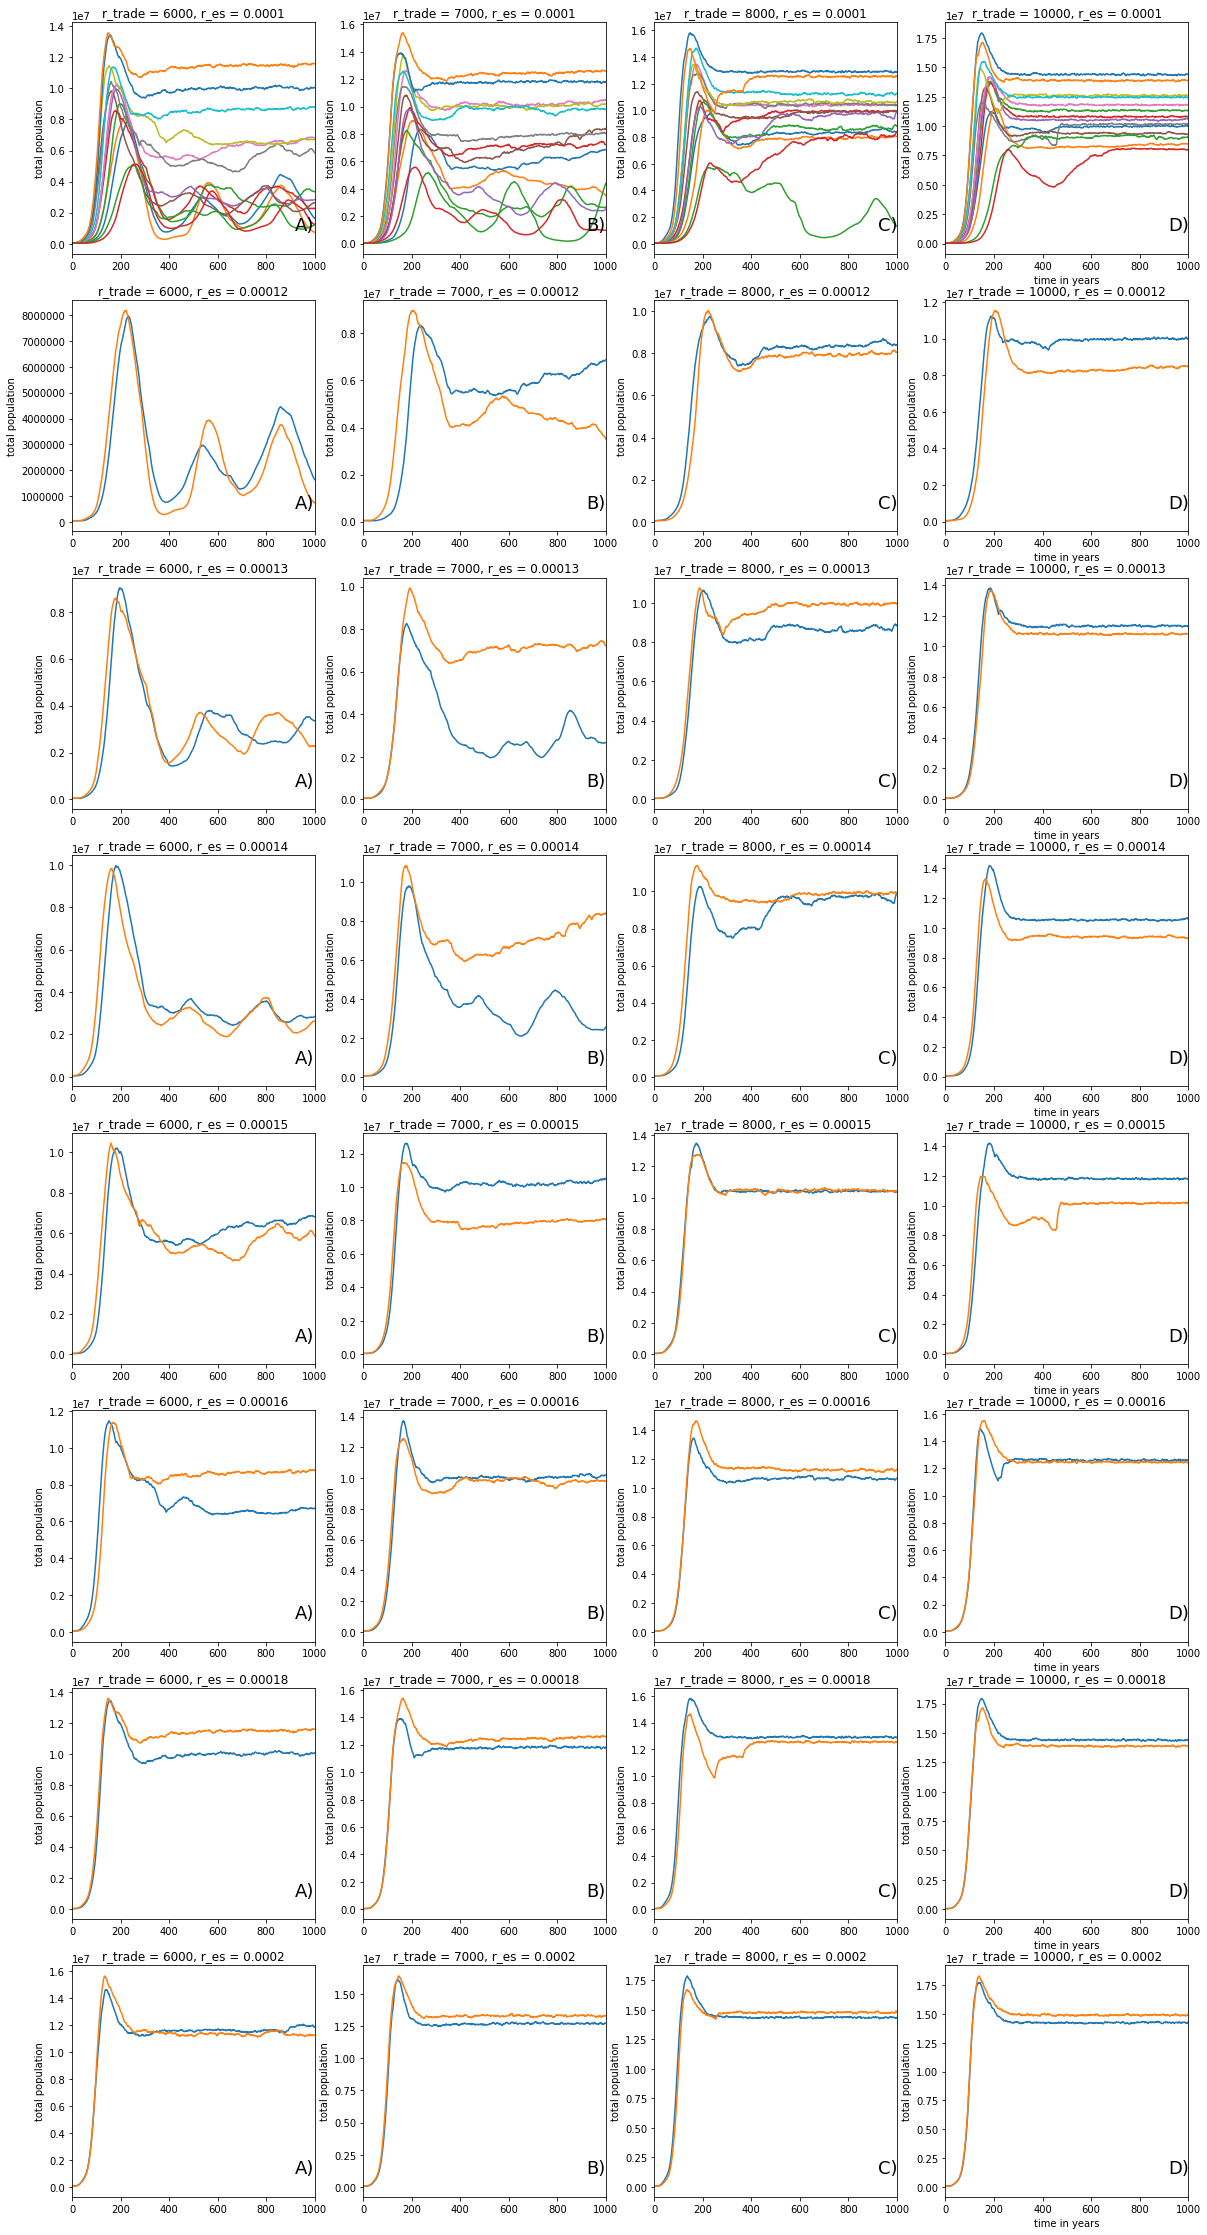

In [57]:
pylab.rcParams['figure.figsize'] = (6, 12)
runs = range(0,14)
all_data.columns = runs

fig, axes = plt.subplots(ncols=len(r_trades), nrows=len(r_ess))

fig.set_figwidth(20)
fig.set_figheight(40)

annotations=['A)', 'B)', 'C)', 'D)']
for i, r_trade in enumerate(r_trades):
    for j, r_es in enumerate(r_ess):

        ax = axes[j,i]
        observable = 'total_population'

        for run in runs:
            df = all_data.xs(key=(r_trade, r_es), level = ('r_trade', 'r_es'))[run]
            try:
                df[0][observable].plot(legend=False, ax=ax)
            except TypeError:
                pass
        ax.set_xlim([0,1000])
        ax.annotate(annotations[i], xy=(0,0), xycoords='data', xytext=(0.92, 0.1), textcoords='axes fraction', fontsize=18)
        ax.set_ylabel('total population')
        ax.set_title(f'r_trade = {r_trade}, r_es = {r_es}')
        if i == len(r_trades)-1:
            ax.set_xlabel('time in years')

plt.savefig('longterm_population_development.pdf')

Wow, this look super interesting! These results tell a number of things:

* Indeed, higher r_es lead to somewhat higher initial overshoot populations

* max population for the initial overshoot is not so much depending on the value of r_es and r_trade only but is also path dependent on the stochasticity of the model.

* the same seems to be true for final population in the complex system state. The value of total population allways settles to a somewhat constant value, but can be very different for different model runs ranging from e.g. min=7.5 * 10^6 to 1.5 * 10^7 for r_trade = 1000 and r_es = 0.0001. I suspect that this is due to differently dense packet settlements on the map (new settlements have to have a certain distance from old ones and therefore, as they appear in a random fashion during the migration process, the end result can be packed with different efficiency)

*I will look at a similar plot with more trajectories from X10 next and will maybe runn X10 also for slightly lower values of trade income*